In [1]:
import utz
from utz import *
from utz.plots import symbols
from benchmarks.cli.data_loader import DEFAULT_PQT_PATH, METHODS

[Papermill](https://papermill.readthedocs.io/en/latest/) parameters:

In [2]:
db_path = DEFAULT_PQT_PATH  # Parquet path to read epoch stats from
out_dir = None              # Directory to save plot PNG/JSON to (e.g. "m3", "azl")
host = None                 # Description of host the stats were collected on, used in plot subtitle (e.g. "M3 Mac", "Amazon Linux")
show = "html"               # Set to "png" to render plots in notebook as PNGs (good for noninteractive mode / Git-committing)
hostname_rgx = None         # Filter DB "hostname" field to values matching this regex
max_batches = 0             # Filter DB `max_batches` column
since = None                # Filter DB to `alb_start` since this datetime
uri_rgx = None              # Filter DB "uri" field to values matching this regex
start_idx = None            # Filter DB to runs consuming dataset slices beginning at this index
end_idx = 123               # Filter DB to runs consuming dataset slices ending at this index
W = 1000                    # Output plot width
H =  600                    # Output plot height

In [3]:
# Parameters
db_path = "/Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/epochs.parquet"
hostname_rgx = None
out_dir = "/Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/s:123"
show = "png"
since = None
start_idx = 0
end_idx = 123
uri_rgx = None


In [4]:
df = pd.read_parquet(db_path)
if hostname_rgx:
    df = df[df.hostname.str.contains(hostname_rgx)].reset_index(drop=True).copy()
if since:
    since = to_dt(since)
    df = df[df.alb_start >= since].reset_index(drop=True).copy()
if uri_rgx:
    df = df[~df.uri.isna()]
    df = df[df.uri.str.contains(uri_rgx)].reset_index(drop=True).copy()
if start_idx is not None:
    df = df[df.start_idx == start_idx].reset_index(drop=True).copy()
if end_idx is not None:
    df = df[df.end_idx == end_idx].reset_index(drop=True).copy()
if max_batches is not None:
    df = df[df.max_batches == max_batches].copy()
df

,start_dt,epoch,n_rows,n_cols,elapsed,gc,max_mem,alb_start_dt,sha,user,hostname,uri,method,batch_size,chunk_size,chunks_per_block,py_buffer_size,soma_buffer_size,block_size,instance_id,instance_type,sorted_datasets,host,collection_id,census_uri,census_version,start_idx,end_idx,max_batches
0,2024-06-20 23:52:26.227144,0,3917270,20000,689.468993,69.434860,33784176640,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,262144,1,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
1,2024-06-21 00:04:45.950687,0,3917270,20000,1724.054488,74.139898,42917699584,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,262144,1,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
2,2024-06-21 00:35:16.797914,0,3917270,20000,718.731283,72.661787,33352708096,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,131072,2,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
3,2024-06-21 00:48:07.956462,0,3917270,20000,1914.548133,74.819597,42832375808,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,131072,2,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
4,2024-06-21 01:22:05.216327,0,3917270,20000,709.834992,73.538658,34856534016,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,65536,4,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
5,2024-06-21 01:34:44.235849,0,3917270,20000,1882.694613,80.615854,41835696128,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,65536,4,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
6,2024-06-21 02:08:17.748370,0,3917270,20000,692.699092,73.929068,34934579200,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,32768,8,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
7,2024-06-21 02:20:48.645075,0,3917270,20000,1891.755281,75.237624,46381830144,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,32768,8,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
8,2024-06-21 02:54:27.090276,0,3917270,20000,709.831691,73.473353,33613262848,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,16384,16,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0
9,2024-06-21 03:07:07.466147,0,3917270,20000,1898.451622,75.419350,39995916288,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,16384,16,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0


In [5]:
hist = df[['uri', 'method', 'chunks_per_block', 'chunk_size']].value_counts().sort_index().rename('num')
hist

Series([], Name: num, dtype: int64)

In [6]:
pivoted = hist.reset_index(level=[0,1]).pivot(columns=['uri', 'method'], values='num')
# assert (pivoted == 5).all().all()
pivoted

chunks_per_block,chunk_size


In [7]:
df['block_size_lg2'] = df.block_size.apply(log2).astype(int)
block_lg2_vals = df.block_size_lg2.unique().tolist()
block_lg2_vals.sort()
min_block_lg2, max_block_lg2 = min(block_lg2_vals), max(block_lg2_vals)
min_block_lg2, max_block_lg2, block_lg2_vals

(16, 18, [16, 17, 18])

In [8]:
df['chunk_lg2'] = df.chunk_size.apply(log2)
chunk_lg2_vals = df.chunk_lg2.apply(int).unique().tolist()
chunk_lg2_vals.sort()
min_chunk_log2, max_chunk_log2 = min(chunk_lg2_vals), max(chunk_lg2_vals)
min_chunk_log2, max_chunk_log2, chunk_lg2_vals

(5, 18, [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [9]:
df['block_chunks_lg2'] = df.chunks_per_block.apply(log2).apply(int)
counts_lg2_vals = df.block_chunks_lg2.unique().tolist()
counts_lg2_vals.sort()
min_block_chunks_lg2, max_block_chunks_lg2 = min(counts_lg2_vals), max(counts_lg2_vals)
min_block_chunks_lg2, max_block_chunks_lg2, counts_lg2_vals

(0, 11, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [10]:
chunk_count_to_size = (
    df
    [['chunk_size', 'chunks_per_block']]
    .value_counts()
    .sort_index()
    .index
    .to_frame()
    .reset_index(drop=True, level=0)
    .chunk_size
    .to_dict()
)
chunk_count_to_size

{2048: 128,
 1024: 256,
 512: 512,
 256: 1024,
 128: 2048,
 64: 4096,
 32: 8192,
 16: 16384,
 8: 32768,
 4: 65536,
 2: 131072,
 1: 262144}

In [11]:
C = 'SOMA chunk size'
N = 'Chunks per shuffle block'
S = 'Samples / sec'
df[C] = pd.Categorical(df.chunk_size.apply(lambda c: f'{c:,}'))
df[N] = pd.Categorical(df.chunks_per_block.apply(lambda c: f'{c:,}'))
chunk_sizes = df[C].unique()
chunks_per_blocks = df[N].unique()
df[S] = df.n_rows / df.elapsed
M = 'Max. memory usage'
df = df.rename(columns={ 'max_mem': M, 'method': 'Method', })
df

,start_dt,epoch,n_rows,n_cols,elapsed,gc,Max. memory usage,alb_start_dt,sha,user,hostname,uri,Method,batch_size,chunk_size,chunks_per_block,py_buffer_size,soma_buffer_size,block_size,instance_id,instance_type,sorted_datasets,host,collection_id,census_uri,census_version,start_idx,end_idx,max_batches,block_size_lg2,chunk_lg2,block_chunks_lg2,SOMA chunk size,Chunks per shuffle block,Samples / sec
0,2024-06-20 23:52:26.227144,0,3917270,20000,689.468993,69.434860,33784176640,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,262144,1,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,18.0,0,"262,144",1,5681.575299
1,2024-06-21 00:04:45.950687,0,3917270,20000,1724.054488,74.139898,42917699584,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,262144,1,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,18.0,0,"262,144",1,2272.126564
2,2024-06-21 00:35:16.797914,0,3917270,20000,718.731283,72.661787,33352708096,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,131072,2,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,17.0,1,"131,072",2,5450.256713
3,2024-06-21 00:48:07.956462,0,3917270,20000,1914.548133,74.819597,42832375808,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,131072,2,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,17.0,1,"131,072",2,2046.054593
4,2024-06-21 01:22:05.216327,0,3917270,20000,709.834992,73.538658,34856534016,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,65536,4,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,16.0,2,"65,536",4,5518.564232
5,2024-06-21 01:34:44.235849,0,3917270,20000,1882.694613,80.615854,41835696128,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,65536,4,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,16.0,2,"65,536",4,2080.672018
6,2024-06-21 02:08:17.748370,0,3917270,20000,692.699092,73.929068,34934579200,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,32768,8,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,15.0,3,"32,768",8,5655.081762
7,2024-06-21 02:20:48.645075,0,3917270,20000,1891.755281,75.237624,46381830144,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,scipy.csr,1024,32768,8,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,15.0,3,"32,768",8,2070.706523
8,2024-06-21 02:54:27.090276,0,3917270,20000,709.831691,73.473353,33613262848,2024-06-20 23:52:25.633276,afb08c16883278a2b30c560c0acb2671101d3489,ec2-user,ip-172-31-4-214.us-west-2.compute.internal,None,np.array,1024,16384,16,1073741824,1073741824,262144,i-0c3fad06c1a8517ff,g4dn.8xlarge,True,tw5,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,123,0,18,14.0,4,"16,384",16,5518.589899
9,2024-06-21 03:07:07.466147,0,3917270,20000,1898.451622,75.419350,39995916

In [12]:
[batch_size] = df.batch_size.unique()
print(f'{batch_size=}')
[n_vars] = df.n_cols.unique()
print(f'{n_vars=}')
[n_rows] = df.n_rows.unique()
print(f'{n_rows=}')
[uri] = df.uri.unique()
print(f'{uri=}')
[instance_type] = df.instance_type.unique()
print(f'{instance_type=}')
[max_batches] = df.max_batches.unique()
print(f'{max_batches=}')

batch_size=1024
n_vars=20000
n_rows=3917270
uri=None
instance_type='g4dn.8xlarge'
max_batches=0


In [13]:
host_str = f"EC2 ({instance_type}), " if instance_type else ""
host_subtitle = f'{host_str}{batch_size} samples per PyTorch batch'

In [14]:
if not uri:
    dataset_subtitle = f'{n_rows:,} cells, streamed (and sliced on the fly) from S3'
elif uri.startswith('s3://'):
    dataset_subtitle = f'{n_rows:,} cells, pre-sliced, read from S3'
else:
    dataset_subtitle = f'{n_rows:,} cells, pre-sliced, read from local disk'

if max_batches:
    dataset_subtitle += f'; {max_batches} batches measured'

In [15]:
def plot(
    fig,
    *args,
    **kwargs,
):
    return utz.plot(
        fig,
        *args,        
        dir=out_dir,
        w=W, h=H,
        show=show,
        html=True,
        **kwargs,
    )

In [16]:
title = "Samples/sec vs. memory use"

def ticktext(e):
    chunk_count = int(2**e)
    return f'{chunk_count:,}'

tickvals = counts_lg2_vals
colorbar = dict(
    title=utz.plots.title(['# Chunks', 'per shuffled block']),
    tickmode='array',
    tickvals=tickvals,
    ticktext=list(map(ticktext, tickvals)),
)

In [17]:
min_size, max_size = 9, 19
block_lg2_span = max_block_lg2 - min_block_lg2
if block_lg2_span == 0:
    df['marker_size'] = (min_size + max_size) / 2
else:
    df['marker_size'] = min_size + (max_size - min_size) * (df.block_size_lg2 - min_block_lg2) / block_lg2_span
size_vals = list(sorted(df.marker_size.unique()))
size_vals

[9.0, 14.0, 19.0]

In [18]:
marker2block_size = df[['block_size', 'marker_size']].drop_duplicates().set_index('marker_size').block_size.to_dict()
marker2block_size

{19.0: 262144, 9.0: 65536, 14.0: 131072}

In [19]:
min_opacity, max_opacity = 0.4, 0.9
default_opacity = 0.8
epoch_vals = list(sorted(df.epoch.unique()))
min_epoch, max_epoch = epoch_vals[0], epoch_vals[-1]
df['marker_opacity'] = min_opacity + (max_opacity - min_opacity) * df.epoch / max_epoch
epoch2opacity = df[['epoch', 'marker_opacity']].drop_duplicates().set_index('epoch').marker_opacity.to_dict()
epoch_vals, epoch2opacity

([0], {0: nan})

Wrote plot JSON to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/s:123/speed_vs_mem_1.png


Wrote plot image to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/s:123/speed_vs_mem_1.png
Wrote HTML to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/s:123/speed_vs_mem_1.html: True


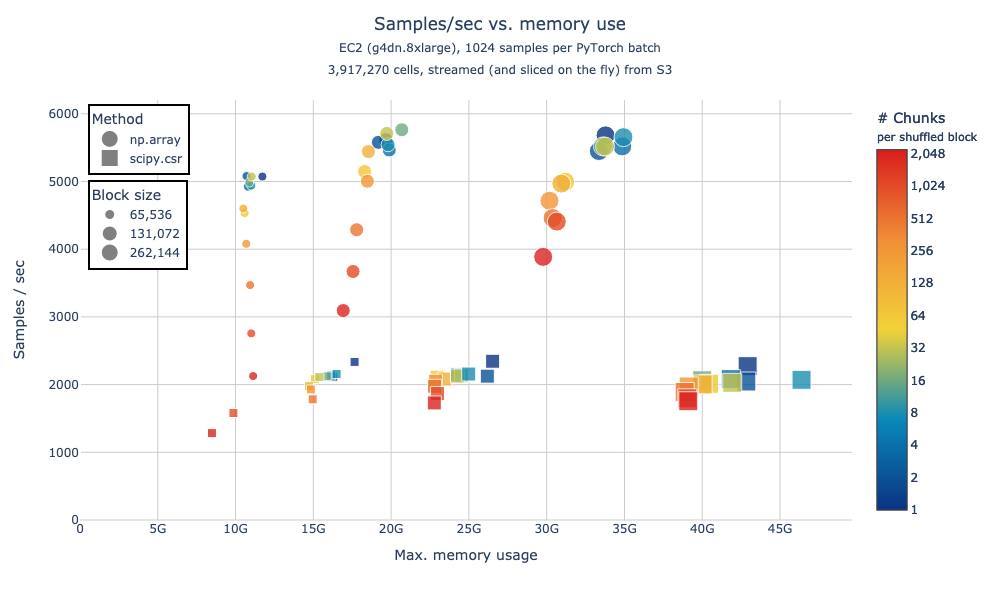

In [20]:
fig = go.Figure()

def dummy_trace(name, legend=None, **kwargs):
    marker = dict(color='gray')
    marker.update(kwargs)
    return go.Scatter(
        name=name,
        legend=legend,
        x=[None], y=[None], mode='markers',
        marker=marker,
    )

def legend(title, **kwargs):
    defaults = dict(
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=2,
        #bgcolor="rgba(0,0,0,0)",
    )
    defaults.update(kwargs)
    return dict(
        title_text=title,
        **defaults
    )

for idx, method in enumerate(METHODS):
    f = df[df.Method == method]
    symbol = symbols[idx]
    marker = dict(
        color=f.block_chunks_lg2,
        colorscale=px.colors.diverging.Portland,
        cmin=min_block_chunks_lg2,
        cmax=max_block_chunks_lg2 + .12,
        colorbar=colorbar,
        showscale=True,
        size=f.marker_size,
        symbol=symbol,
    )
    if len(epoch_vals) > 1:
        marker['opacity'] = f.marker_opacity
    else:
        marker['opacity'] = default_opacity

    fig.add_trace(go.Scatter(
        name=method,
        x=f[M],
        y=f[S],
        mode='markers',
        marker=marker,
        customdata=f[['epoch', 'chunk_size', 'chunks_per_block', 'block_size',]],
        showlegend=False,
    ))

    # Dummy traces, for legend: one per fmt, set color/size (instead of inheriting from last data point in `f`)
    size = size_vals[-1]
    fig.add_trace(dummy_trace(
        method,
        size=size,
        symbol=symbol,
    ))

# Dummy legend/traces for `block_size` facet (represented by marker size)
if len(size_vals) > 1:
    for size in size_vals:
        block_size = marker2block_size[size]
        fig.add_trace(dummy_trace(
            f"{block_size:,}",
            legend="legend2",
            size=size,
            #symbol=symbols[0],
        ))

method_block_legends_v = dict(
    legend =legend('Method',     x=.01, y=.99, ),
    legend2=legend('Block size', x=.01, y=.81, ),
)
method_block_legends_h = dict(
    legend =legend('Method',     x=.145, y=.99, ),
    legend2=legend('Block size', x=.01,  y=.99, ),
)
method_block_legends = method_block_legends_v if end_idx == 123 else method_block_legends_h

if len(epoch_vals) > 1:
    # Dummy legend/traces for `epoch` facet (represented by marker opacity)
    #for epoch, opacity in [ (min_epoch, min_opacity), (max_epoch, max_opacity) ]:
    for epoch, opacity in epoch2opacity.items():
        fig.add_trace(dummy_trace(
            f"{epoch}",
            legend="legend3",
            size=max_size,
            opacity=opacity,
        ))
    legends = dict(
        **method_block_legends_v,
        legend3=legend('Epoch',      x=.15, y=.99, ),
    )
else:
    legends = method_block_legends

fig = plot(
    fig,
    utz.plots.title([
        title,
        host_subtitle,
        dataset_subtitle,
    ], subtitle_size="0.7em"),
    title_y=.95,
    name="speed_vs_mem_1",
    hovertemplate=[
        *(["Epoch: %{customdata[0]}"] if len(epoch_vals) > 1 else []),
        "%s: %%{customdata[1]}" % C,
        "Chunks per shuffled block: %{customdata[2]}",
        "Shuffled block size: %{customdata[3]}",
        "Samples/sec: %{y:,d}",
        "Memory: %{x:.3s}",
    ],
    xtitle=M,
    xaxis_tickformat='s',
    xaxis_rangemode='tozero',
    ytitle=S,
    **legends,
    zerolines='y',
)
fig
#from IPython.display import HTML
#HTML(fig.to_html(include_plotlyjs='cdn'))